In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('C:/Users/meryg/Downloads/archive/googl_data_2020_2025.csv')
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
...,...,...,...,...,...,...,...
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700


In [14]:
df = df.drop([0,1]) # First two rows can be ignore
df.info() # No Null values, dataset is pretty clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 2 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1258 non-null   object
 1   Adj Close  1258 non-null   object
 2   Close      1258 non-null   object
 3   High       1258 non-null   object
 4   Low        1258 non-null   object
 5   Open       1258 non-null   object
 6   Volume     1258 non-null   object
dtypes: object(7)
memory usage: 68.9+ KB


In [15]:
# Define list of columns to convert to float64 data type
list_cols = ['Adj Close', 'Close','High','Low','Open','Volume']

# Convert each column in list_cols to float64 type
for i in list_cols:
    df[i] = df[i].astype('float64')

# Convert 'Price' column to datetime format
df['Price'] = pd.to_datetime(df['Price'])

# Display dataframe information including dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 2 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Price      1258 non-null   datetime64[ns, UTC]
 1   Adj Close  1258 non-null   float64            
 2   Close      1258 non-null   float64            
 3   High       1258 non-null   float64            
 4   Low        1258 non-null   float64            
 5   Open       1258 non-null   float64            
 6   Volume     1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 68.9 KB


In [16]:
# Assign values from 'Price' column to 'Date' column (likely a column rename operation)
df['Date'] = df['Price']

In [17]:
# Convert the 'Date' column to string format 'YYYY-MM-DD' using strftime()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [18]:
# Remove the first column (index 0) from the DataFrame
df = df.drop(df.columns[0], axis=1)

In [19]:
df = df[[ 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

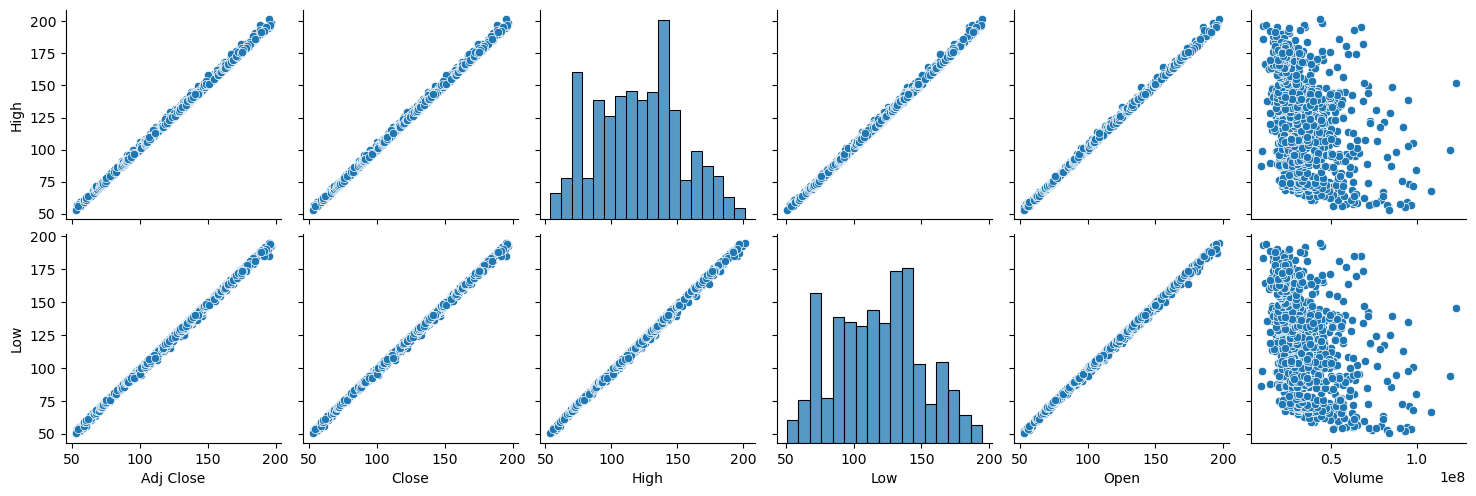

In [21]:
# Create a pairplot to visualize relationships between 'High' and 'Low' prices
# against all other numerical variables in the dataframe
sns.pairplot(data = df, y_vars = ['High','Low'])

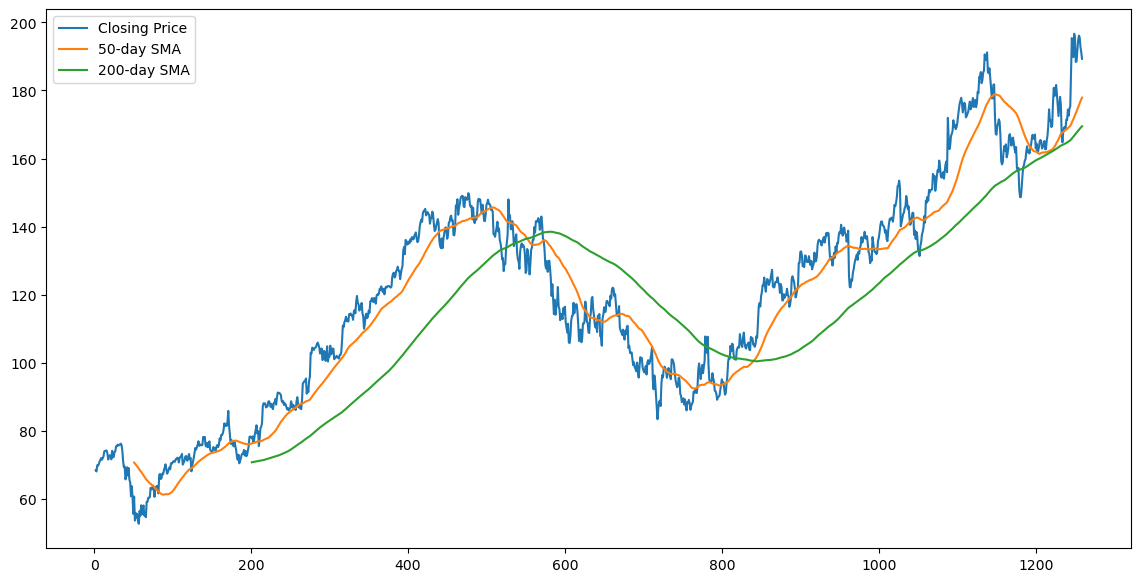

In [34]:
# Calculate Simple Moving Averages (SMA)
# 50-day SMA - medium-term trend indicator
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # Calculates 50-day moving average of closing prices
# 200-day SMA - long-term trend indicator
df['SMA_200'] = df['Close'].rolling(window=200).mean()  # Calculates 200-day moving average of closing prices

# Calculate RSI (Relative Strength Index) indicator
def RSI(series, period=14):
    """
    Calculates the RSI (Relative Strength Index) for a given time series
    
    Args:
        series: Price series
        period: Period for RSI calculation (default 14 days)
    Returns:
        Series containing RSI values
    """
    # Calculate price changes between each day
    delta = series.diff(1)
    # Calculate average gains over the specified period
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    # Calculate average losses over the specified period
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    # Calculate relative strength ratio (average gains / average losses)
    rs = gain / loss
    # Convert ratio to RSI index between 0 and 100
    return 100 - (100 / (1 + rs))

# Apply RSI on closing prices with default 14-day period
df['RSI'] = RSI(df['Close'])  # Add new column with RSI values

# Create chart to visualize technical indicators
plt.figure(figsize=(14,7))  # Set chart dimensions in inches (width=14, height=7)
plt.plot(df['Close'], label='Closing Price')  # Plot closing price curve
plt.plot(df['SMA_50'], label='50-day SMA')    # Plot 50-day moving average
plt.plot(df['SMA_200'], label='200-day SMA')  # Plot 200-day moving average
plt.legend()  # Add chart legend
plt.show()    # Display the chart

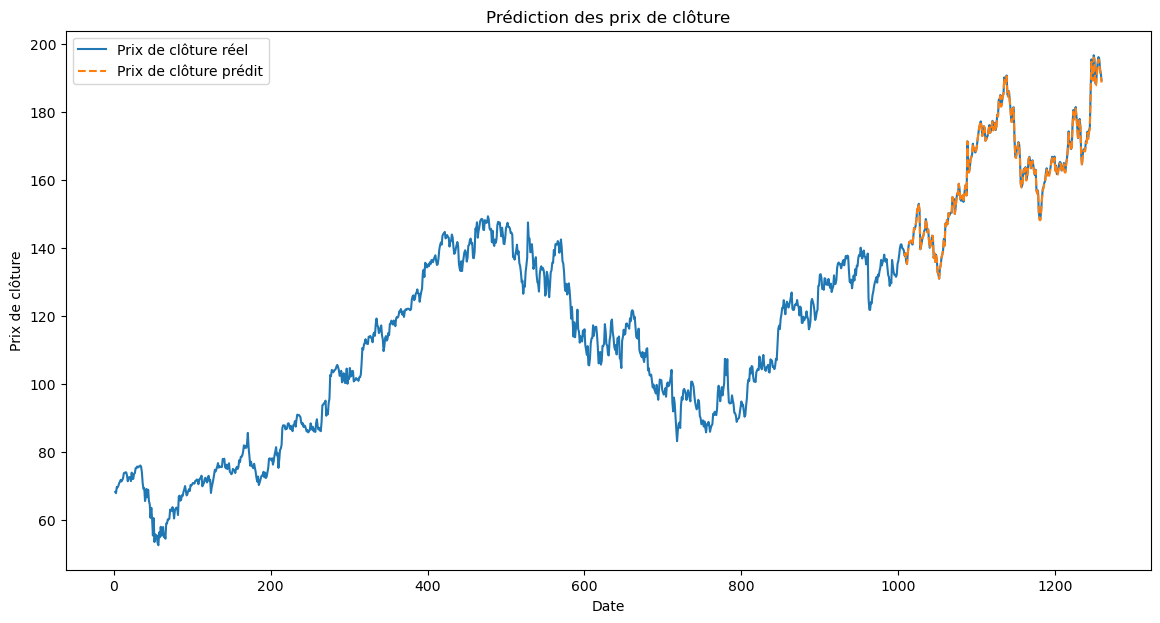

In [26]:
# Set adjusted closing prices as target variable (dependent variable)
y = df['Adj Close']

# Use other columns as explanatory variables for the model (independent variables)
# These features will be used to predict the adjusted closing price
X = df[['Close', 'High', 'Low', 'Open', 'Volume']]

# Split data into training (80%) and test (20%) sets
# shuffle=False maintains chronological order which is important for time series data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize linear regression model object and fit it to training data
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions for test set using trained model
y_pred = model.predict(X_test)

# Create new column for predictions in original dataframe
# Fill with NaN values initially
df['Predicted Close'] = np.nan
# Add predictions only for test period (last 20% of data)
df.iloc[len(y_train):, df.columns.get_loc('Predicted Close')] = y_pred

# Visualize actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Adj Close'], label='Prix de clôture réel')  # Plot actual prices
plt.plot(df.index, df['Predicted Close'], label='Prix de clôture prédit', linestyle='--')  # Plot predictions
plt.xlabel('Date')  # X-axis label
plt.ylabel('Prix de clôture')  # Y-axis label
plt.title('Prédiction des prix de clôture')  # Plot title
plt.legend()  # Add legend
plt.show()  # Display the plot

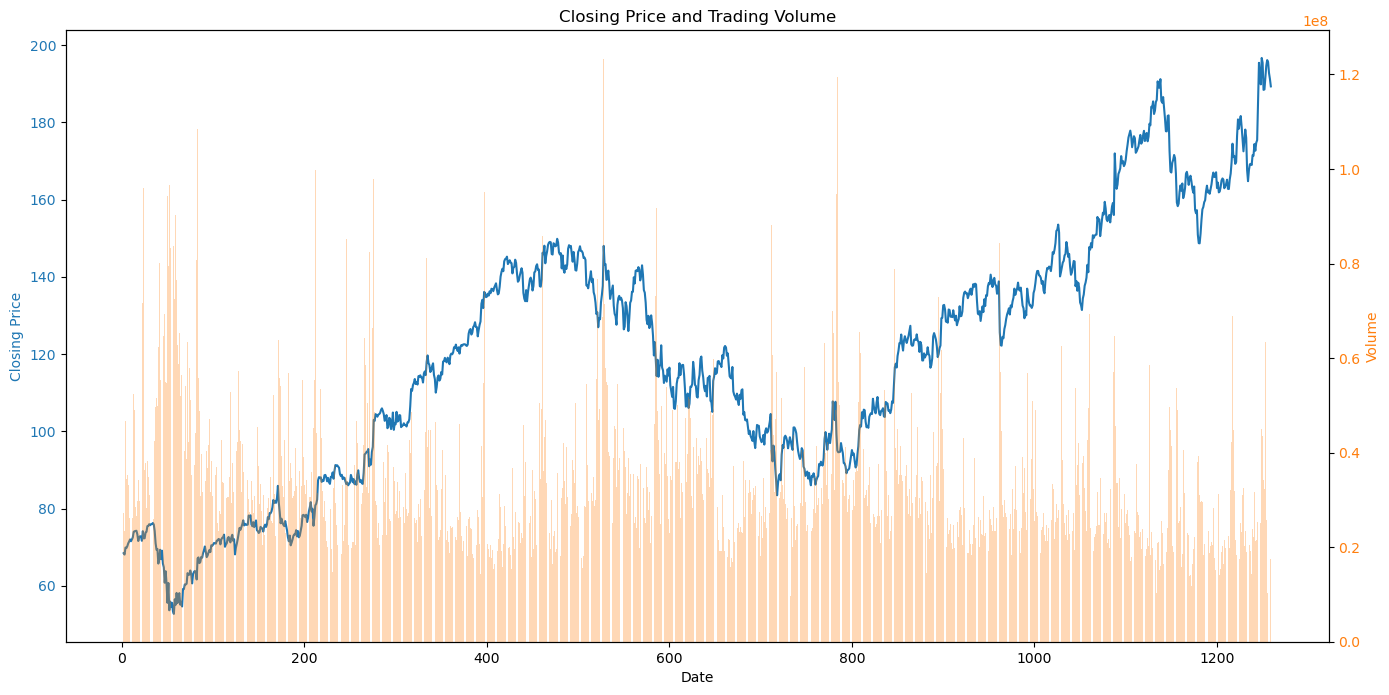

In [36]:
# Create a figure with two overlapping y-axes
fig, ax1 = plt.subplots(figsize=(14,7))  # Create a figure of size 14x7 inches

# Configure first axis (left y-axis) for closing prices
ax1.set_xlabel('Date')  # Set x-axis label
ax1.set_ylabel('Closing Price', color='tab:blue')  # Set left y-axis label in blue
ax1.plot(df.index, df['Close'], label='Closing Price', color='tab:blue')  # Plot price line
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color left y-axis ticks in blue

# Configure second axis (right y-axis) for volumes
ax2 = ax1.twinx()  # Create a twin y-axis sharing the same x-axis
ax2.set_ylabel('Volume', color='tab:orange')  # Set right y-axis label in orange
ax2.bar(df.index, df['Volume'], alpha=0.3, color='tab:orange')  # Create semi-transparent bar chart
ax2.tick_params(axis='y', labelcolor='tab:orange')  # Color right y-axis ticks in orange

# Adjust layout automatically
fig.tight_layout()  # Automatically adjust spacing between plot elements
plt.title('Closing Price and Trading Volume')  # Add plot title
plt.show()  # Display the plot